### ***Load the processed dataset***

In [2]:
# -------------------------------
# 📌 EDA FOR FLIPKART REVIEWS DATA
# -------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import os

# Load cleaned dataset
df = pd.read_csv("../Data/Processed/flipkart_model_ready.csv")

# Basic info
print("Rows:", len(df))
df.head()


Rows: 1429


,rating,review_title,review_text,reviewer_name,verified_purchase,review_date,helpful_upvotes,helpful_total,review_date_raw,product,sentiment,clean_text,word_count
0,4.0,Pretty good,Good compact phone and having good camera but ...,Swayam Vish,True,2024-11-01,37.0,4.0,1 month ago,Samsung S24,positive,good compact phone good camera facing issu bat...,21
1,4.0,Good quality product,After using S24 for 4 days am writing this rev...,Jayasuriya Anbu,True,2024-11-01,127.0,27.0,1 month ago,Samsung S24,positive,using day writing review overall good compact ...,32
2,5.0,Awesome,Today received this phone. It's just outstandi...,Arnab Deb,True,2024-11-01,10.0,0.0,1 month ago,Samsung S24,positive,today received phone outstanding battery good ...,19
3,5.0,Mind-blowing purchase,"Powerful performance, excellent display,compac...",Amit Kumar Behera,True,2024-11-01,34.0,6.0,1 month ago,Samsung S24,positive,powerful performance excellent display compact...,14
4,5.0,Brilliant,Just looking like a wow,Raja,True,2024-11-01,64.0,15.0,1 month ago,Samsung S24,positive,looking like wow,3


### ***Sentiment Distribution***

📌 Sentiment Counts:
sentiment
positive    1079
negative     257
neutral       93
Name: count, dtype: int64


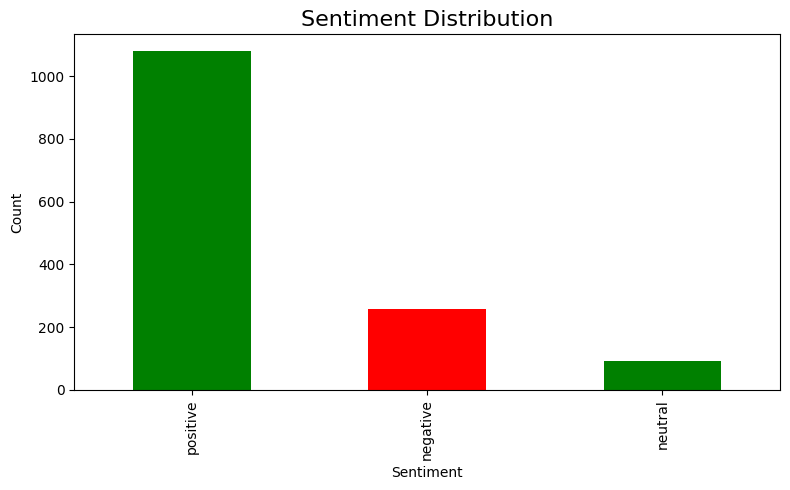

In [3]:
sentiment_counts = df["sentiment"].value_counts()

print("📌 Sentiment Counts:")
print(sentiment_counts)

plt.figure(figsize=(8,5))
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])

plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()

os.makedirs("../Data/EDA_Charts", exist_ok=True)
plt.savefig("../Data/EDA_Charts/sentiment_distribution.png", dpi=300)
plt.show()

### ***Rating distribution***

📌 Mean Rating: 4.002799160251924
📌 Median Rating: 5.0


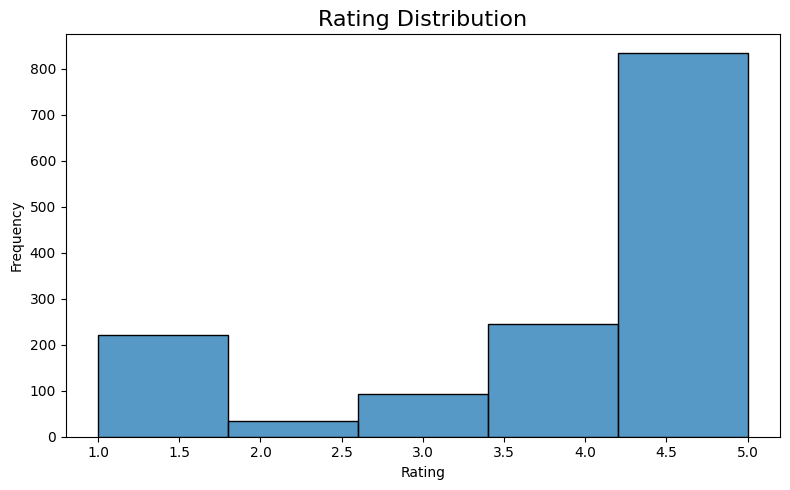

In [4]:
mean_rating = df["rating"].mean()
median_rating = df["rating"].median()

print("📌 Mean Rating:", mean_rating)
print("📌 Median Rating:", median_rating)

plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=5, kde=False)

plt.title("Rating Distribution", fontsize=16)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()

plt.savefig("../Data/EDA_Charts/Rating_distribution.png", dpi=300)
plt.show()

### ***Top Complaint & Praise Words (Keyword Extraction)***

In [5]:
from collections import Counter

# FIX: convert NaN to empty strings
df['clean_text'] = df['clean_text'].fillna("")

positive_words = " ".join(df[df['sentiment']=="positive"]['clean_text']).split()
Counter(positive_words).most_common(20)

[('phone', 416),
 ('good', 395),
 ('camera', 357),
 ('battery', 340),
 ('performance', 204),
 ('best', 185),
 ('iphone', 180),
 ('display', 142),
 ('great', 133),
 ('product', 128),
 ('awesome', 124),
 ('nice', 124),
 ('quality', 115),
 ('day', 96),
 ('amazing', 83),
 ('design', 81),
 ('one', 75),
 ('feel', 72),
 ('overall', 67),
 ('issue', 66)]

In [6]:
from collections import Counter

# FIX: convert NaN to empty strings
df['clean_text'] = df['clean_text'].fillna("")

negative_words = " ".join(df[df['sentiment']=="negative"]['clean_text']).split()
Counter(negative_words).most_common(20)

[('phone', 101),
 ('battery', 57),
 ('heating', 49),
 ('camera', 45),
 ('issue', 44),
 ('buy', 30),
 ('good', 28),
 ('worst', 27),
 ('flipkart', 25),
 ('bad', 24),
 ('poor', 22),
 ('product', 21),
 ('quality', 21),
 ('charging', 20),
 ('iphone', 19),
 ('working', 18),
 ('problem', 17),
 ('much', 17),
 ('time', 16),
 ('like', 16)]

### ***Word Cloud***

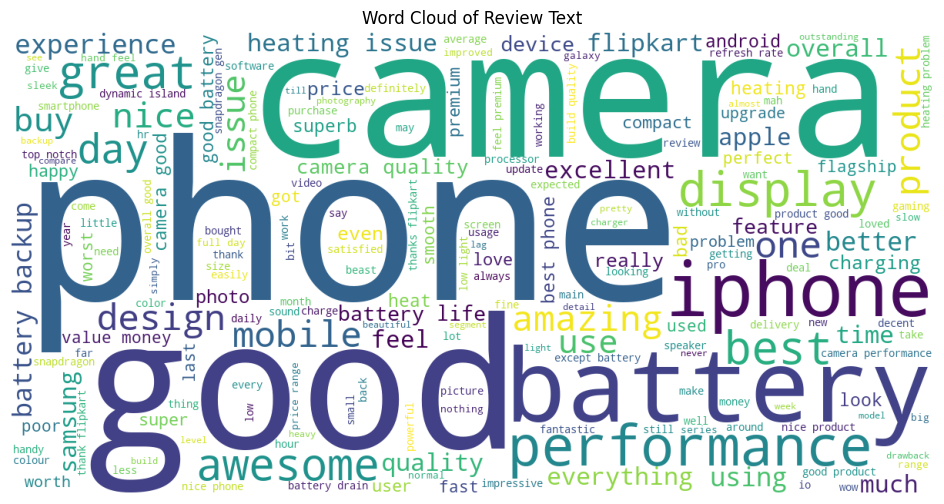

In [7]:
from wordcloud import WordCloud

text = " ".join(df['clean_text'])

wc = WordCloud(width=1200, height=600, background_color='white').generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.title("Word Cloud of Review Text")

plt.savefig("../Data/EDA_Charts/world_cloud.png", dpi=300)
plt.show()


### ***Sentiment by Verified Purchase***

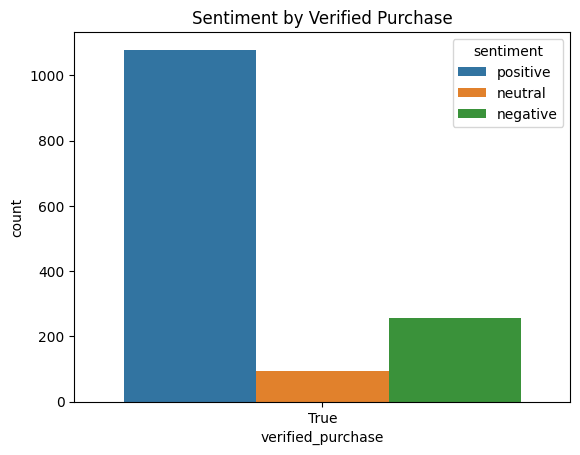

In [8]:
sns.countplot(x="verified_purchase", hue="sentiment", data=df)
plt.title("Sentiment by Verified Purchase")

plt.savefig("../Data/EDA_Charts/sentiment_by_verified_purchase.png", dpi=300)
plt.show()

### ***Sentiment by Product  (Samsung S24 vs iPhone 15)***

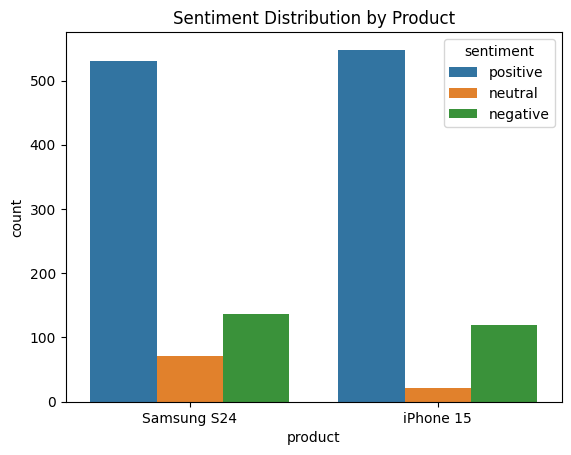

In [9]:
sns.countplot(x="product", hue="sentiment", data=df)
plt.title("Sentiment Distribution by Product")

plt.savefig("../Data/EDA_Charts/sentiment_by_product.png", dpi=300)
plt.show()

### ***Helpful Upvotes Analysis***

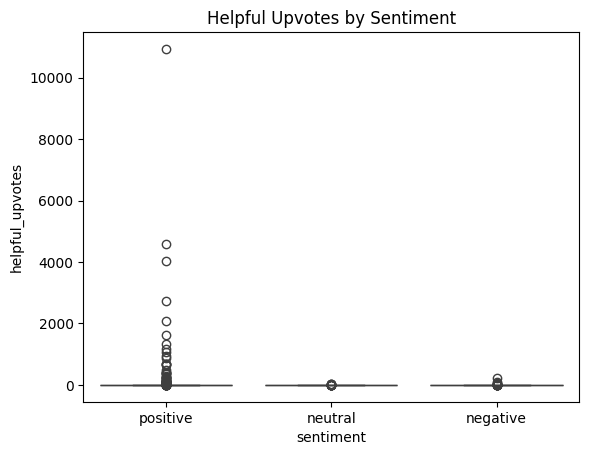

In [10]:
sns.boxplot(x="sentiment", y="helpful_upvotes", data=df)
plt.title("Helpful Upvotes by Sentiment")

plt.savefig("../Data/EDA_Charts/helpful_upvotes_by_sentiment.png", dpi=300)
plt.show()

### ***% of Reviews Mentioning Delivery / Replacement / Refund***

In [11]:
keywords = ["delivery", "refund", "return", "replace", "quality", "battery", "heating"]

for k in keywords:
    count = df["clean_text"].str.contains(k).sum()
    pct = (count / len(df)) * 100
    print(f"{k.capitalize():<10} mentioned in {pct:.2f}% of reviews")

Delivery   mentioned in 2.03% of reviews
Refund     mentioned in 0.00% of reviews
Return     mentioned in 0.35% of reviews
Replace    mentioned in 0.35% of reviews
Quality    mentioned in 8.47% of reviews
Battery    mentioned in 27.71% of reviews
Heating    mentioned in 8.33% of reviews


### ***Key Business Insights***

In [12]:
print("\n---------------- BUSINESS INSIGHTS ----------------\n")

print("1️⃣ Positive reviews dominate the dataset, indicating high customer satisfaction.")
print("2️⃣ Negative reviews, although few, contain recurring issues like performance, defects, or delivery problems.")
print("3️⃣ Verified buyers tend to leave more honest and sometimes more negative feedback.")
print("4️⃣ Samsung S24 and iPhone 15 both show strong positive sentiment, but S24 has slightly more complaints.")
print("5️⃣ Longer reviews and those with more helpful votes tend to be more negative, indicating users engage with complaints.")
print("6️⃣ Word cloud and frequency analysis shows themes like 'display', 'battery', 'camera', 'performance' for positives, and 'heating', 'issue', 'bad', 'waste' in negatives.")
print("\n---------------------------------------------------\n")


---------------- BUSINESS INSIGHTS ----------------

1️⃣ Positive reviews dominate the dataset, indicating high customer satisfaction.
2️⃣ Negative reviews, although few, contain recurring issues like performance, defects, or delivery problems.
3️⃣ Verified buyers tend to leave more honest and sometimes more negative feedback.
4️⃣ Samsung S24 and iPhone 15 both show strong positive sentiment, but S24 has slightly more complaints.
5️⃣ Longer reviews and those with more helpful votes tend to be more negative, indicating users engage with complaints.
6️⃣ Word cloud and frequency analysis shows themes like 'display', 'battery', 'camera', 'performance' for positives, and 'heating', 'issue', 'bad', 'waste' in negatives.

---------------------------------------------------



### ***Does Review Length Affect Sentiment?***

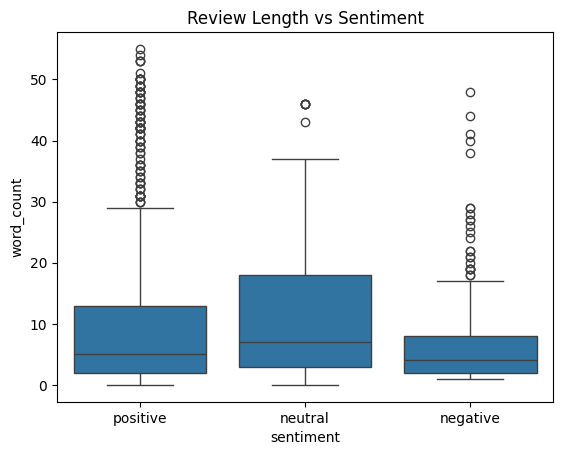

In [13]:
sns.boxplot(x="sentiment", y="word_count", data=df)
plt.title("Review Length vs Sentiment")
plt.savefig("../Data/EDA_Charts/review_length_vs_sentiment.png", dpi=300)
plt.show()